## Pymaceuticals Inc.

### Drugs vs tumor

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as scs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up the path to files with data
mouse_data_file = 'Resources/Mouse_metadata.csv'
study_result_data_file = 'Resources/Study_results.csv'

In [3]:
# Read mouse_metadata.csv file to DataFrame
mouse_original_df = pd.read_csv(mouse_data_file)
mouse_original_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Read study_result.csv to DataFrame
study_res_original_df = pd.read_csv(study_result_data_file)
study_res_original_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Merge both df together. Inner join because we need anly mouse that included in study_result file
summary_df = study_res_original_df.merge(mouse_original_df, on='Mouse ID', how='inner')
summary_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Find duplicated mouses 
duplicated_row_df = summary_df[summary_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_row_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Get mouse id from duplicated df
mouse_id = duplicated_row_df['Mouse ID'].unique()
mouse_id = mouse_id[0]

# delete all rows with given mouse id
summary_df.drop(summary_df[summary_df['Mouse ID'] == mouse_id].index, inplace=True)
len(summary_df['Mouse ID'].unique())

248

#### Summary Statistics

Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [8]:
# groupby by drug regime
regime = summary_df.groupby('Drug Regimen')

# generate mean 
mean_tumor_volume = regime['Tumor Volume (mm3)'].mean()

# generate median
median_tumor_volume = regime['Tumor Volume (mm3)'].median()

drugs = summary_df['Drug Regimen'].unique()
drugs

# variable to store variance, standart deviation and sem for each drug
variance = []
st_dv = []
std_err = []

for drug in drugs:
    certain_drug = summary_df[summary_df['Drug Regimen'] == drug]
    #tumor_volume = certain_drug[]
    variance.append(scs.tvar(certain_drug['Tumor Volume (mm3)']))
    st_dv.append(scs.tstd(certain_drug['Tumor Volume (mm3)']))
    std_err.append(scs.sem(certain_drug['Tumor Volume (mm3)']))

    
# Create a summary df
base_statistics_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume
                                  , "Median Tumor Volume": median_tumor_volume
                                  , "Tumor Volume Variance": variance
                                  , 'Tumor Volum Std. Dev.': st_dv
                                  , "Tumor Volum Std. Err": std_err})
base_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volum Std. Dev.,Tumor Volum Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,68.553577,8.279709,0.603860
Infubinol,52.884795,51.820584,66.173479,8.134708,0.596466
Ketapril,55.235638,53.698743,43.128684,6.567243,0.492236
Naftisol,54.331565,52.509285,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,23.486704,4.846308,0.320955
Propriva,52.320930,50.446266,48.533355,6.966589,0.516398
Ramicane,40.216745,40.673236,43.852013,6.622085,0.544332
Stelasyn,54.233149,52.431737,61.168083,7.821003,0.581331


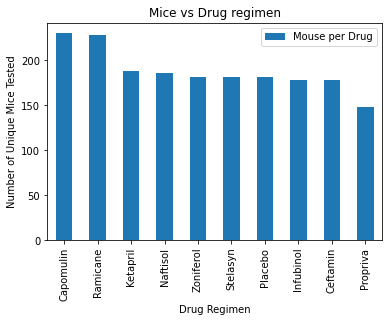

In [9]:
# Bar chart via pandas.plot
mouse_per_drugs = []

for drug in drugs:
    mouse_per_drugs.append(summary_df[summary_df['Drug Regimen'] == drug]['Mouse ID'].count())

    
mouse_per_drugs

mouse_vs_drugs_df = pd.DataFrame({'Drugs': drugs, 'Mouse per Drug': mouse_per_drugs}, index=drugs)
mouse_vs_drugs_df= mouse_vs_drugs_df.sort_values(by='Mouse per Drug', ascending=False)
bar_plot = mouse_vs_drugs_df.plot.bar()
bar_plot.set(xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested', title='Mice vs Drug regimen')
plt.show()

In [ ]:
# Matplotlib Bar Chart 

#plt.bar(drugs, mouse_per_drugs)
plt.bar(mouse_vs_drugs_df['Drugs'], mouse_vs_drugs_df['Mouse per Drug'])
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel='Drug Regimen'
plt.ylabel('Number of Unique Mice Tested')
plt.title('Mice vs Drug regimen')
plt.show()

In [ ]:
# Pandas Pie plot mouse gender
pie_plot = summary_df['Sex'].value_counts().plot.pie(y="Sex", autopct='%1.1f%%', startangle=0)
plt.show()

In [ ]:
sex = summary_df['Sex'].value_counts()
pie_labels = ['Male', 'Female']
plt.pie(sex, labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title("Chart of Mouse Gender")
#plt.xlabel = 'Sex'
plt.show()

#### Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [ ]:
# Create a df to calculate final tumor volume
final_tumor_volume_df = summary_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
final_tumor_volume_df.head()

In [ ]:
# leave only data for 4 drug regimen: 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_volume_df = final_tumor_volume_df.sort_values(['Mouse ID', 'Timepoint'])
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimen)]
final_tumor_volume_df.head(20)

In [ ]:
## Group data by 'Mouse ID' to find max volume of tumor for the last timepoint

max_timepoint_df = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df.reset_index()

max_tumor_volume_df = final_tumor_volume_df.merge(max_timepoint_df, on=['Mouse ID', 'Timepoint'])
max_tumor_volume_df

In [ ]:
# find IQR for each treatment


for drug in treatment_regimen:
    
    tumor_volume_by_drug = max_tumor_volume_df[max_tumor_volume_df['Drug Regimen'] == drug]    
    tumor_volume_by_drug = tumor_volume_by_drug['Tumor Volume (mm3)']
    
    quartiles = tumor_volume_by_drug.quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    
    iqr = q3 - q1
    iqr_1_5 = iqr * 1.5
    
    
    q1_bound = q1 - iqr_1_5
    q3_bound = q3 + iqr_1_5
    outliers = [q1_bound, q3_bound]
    
    potential_outliers = []
    for value in tumor_volume_by_drug:
        if value < q1_bound or value > q3_bound:
            potential_outliers.append(value)
    
    #print(potential_outliers)
    print(f"{drug}'s potential outliers: {potential_outliers}")
 
    

In [ ]:
flierprops = dict(marker='o', markerfacecolor='red')
max_tumor_volume_df.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', flierprops=flierprops)
plt.title('')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

treated_mouses = summary_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
treated_mouses = treated_mouses[treated_mouses['Drug Regimen'] == 'Capomulin']
#treated_mouse = treated_mouse.groupby('Mouse ID')[['Timepoint']]
treated_mice = treated_mouses[treated_mouses['Mouse ID'] == 'l509']
treated_mice


In [ ]:
plt.plot(treated_mice['Timepoint'], treated_mice['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mice l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volum (mm3)')